In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("Car Fuel and Emissions 2000-2013.csv",low_memory=False)
df.head()

,file,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,...,nox_emissions,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,618.0,NaN,NaN,NaN,NaN,NaN
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,2,NaN,M5,Manual,1970.0,...,NaN,NaN,NaN,NaN,663.0,NaN,NaN,NaN,NaN,NaN
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,626.0,NaN,NaN,NaN,NaN,NaN
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN


<Axes: >

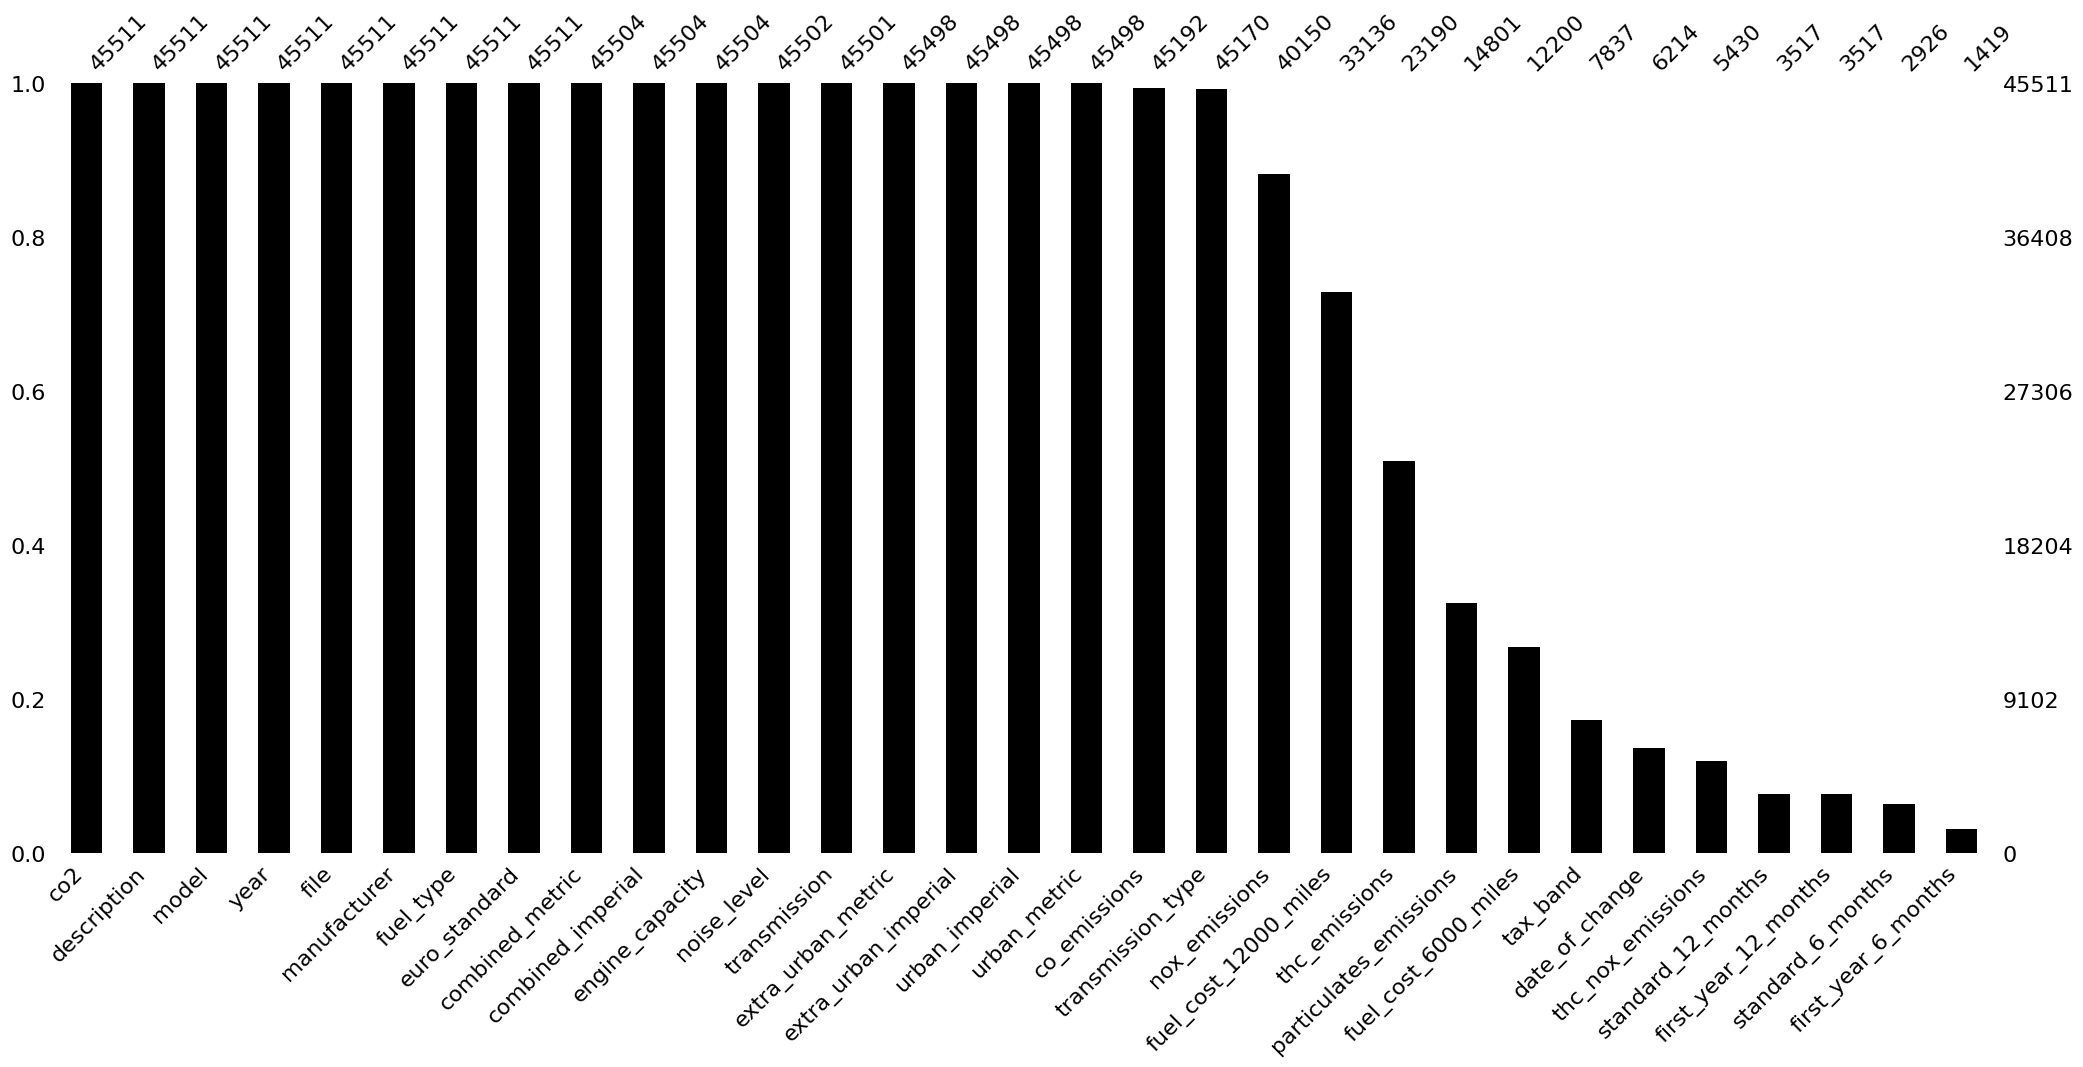

In [3]:
import missingno as mns
mns.bar(df, sort='descending', color = 'black')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45511 entries, 0 to 45510
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   file                    45511 non-null  object 
 1   year                    45511 non-null  int64  
 2   manufacturer            45511 non-null  object 
 3   model                   45511 non-null  object 
 4   description             45511 non-null  object 
 5   euro_standard           45511 non-null  int64  
 6   tax_band                7837 non-null   object 
 7   transmission            45501 non-null  object 
 8   transmission_type       45170 non-null  object 
 9   engine_capacity         45504 non-null  float64
 10  fuel_type               45511 non-null  object 
 11  urban_metric            45498 non-null  float64
 12  extra_urban_metric      45498 non-null  float64
 13  combined_metric         45504 non-null  float64
 14  urban_imperial          45498 non-null

<Axes: >

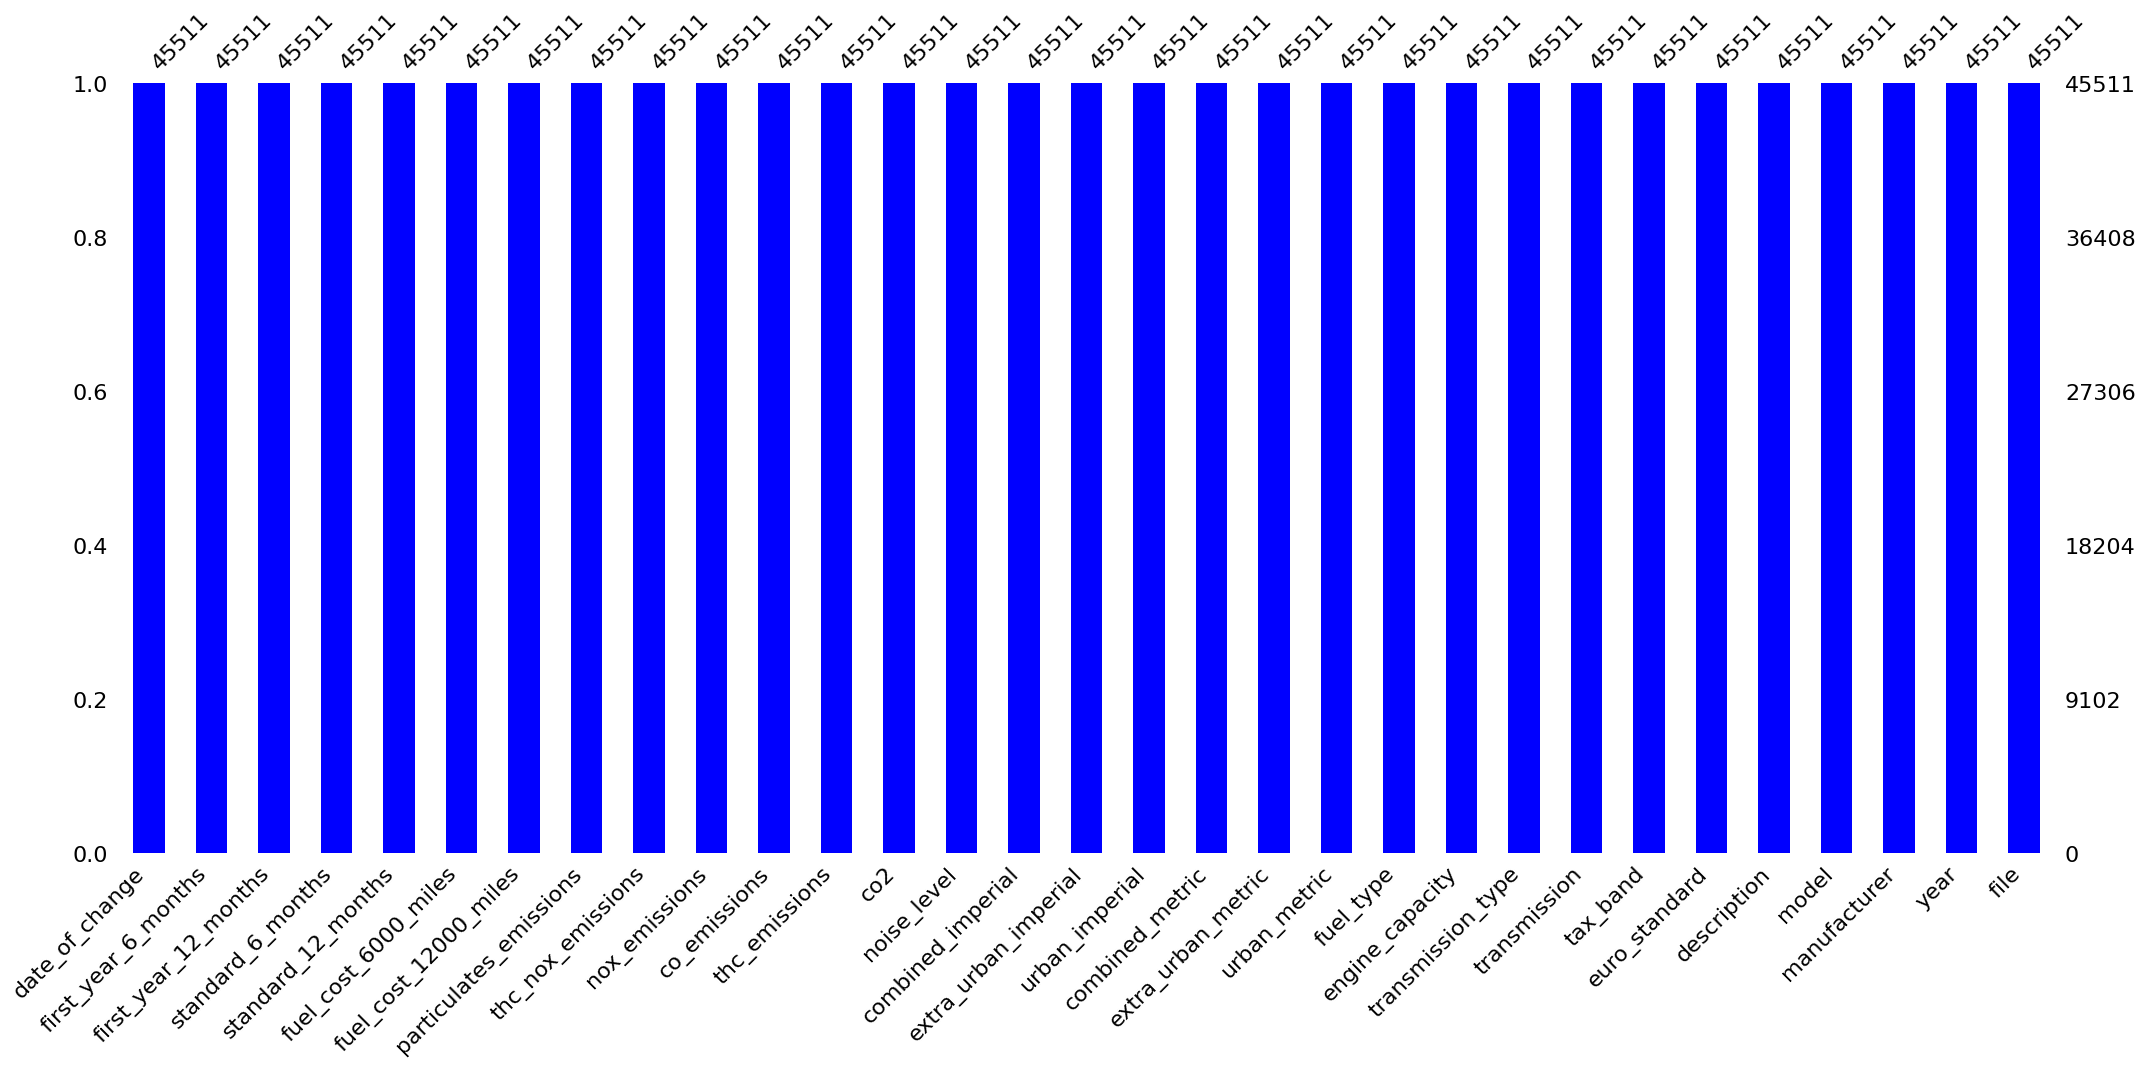

In [5]:
import warnings
warnings.filterwarnings("ignore")
category = df.select_dtypes(include=['object','category'])
numerical = df.select_dtypes(include=['int', 'float'])
for x in category:
    df[x].fillna(df[x].mode()[0], inplace=True)
for x in numerical:
    df[x].fillna(df[x].mean(), inplace=True)
import missingno as mns
mns.bar(df, sort='descending', color = 'blue')    
  

In [6]:
##CO2 Emission Category: Can you create a column that categorizes cars based on their co2 emission into low medium and high?
df['co_emissions'].max()

np.float64(75000.0)

In [7]:
df['co_emissions'].unique()

array([9.800e+02, 1.105e+03, 1.103e+03, ..., 3.500e-01, 9.690e+02,
       7.430e+02])

In [8]:
df['co_emissions'].nunique()

1511

In [9]:
def categorize_co2E(co2):
    if co2 < 0:
        return "invalid"
    elif co2 <= 15000:
        return "Low"
    elif 15000 < co2 <= 50000:
        return 'Medium'
    else:
        return 'High'
df['CO2 Emission Category'] = df['co_emissions'].apply(categorize_co2E) 
df.head()

,file,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,...,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change,CO2 Emission Category
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,G,M5,Manual,1598.0,...,171.675235,3.312089,1548.09449,618.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,G,M5,Manual,1747.0,...,171.675235,3.312089,1548.09449,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,2,G,M5,Manual,1970.0,...,171.675235,3.312089,1548.09449,663.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,G,M5,Manual,1598.0,...,171.675235,3.312089,1548.09449,626.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,G,M5,Manual,1747.0,...,171.675235,3.312089,1548.09449,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low


In [10]:
##TRANSMISSION CATEGORY:CAN YOU CREATE A BINARY COLUMN THAT LABELS CARS AS EITHER 'AUTOMATIC' OR 'MANUAL' BASED ON THE TRANSMISSSION TYPE?
df['BinaryTransmission Category'] = df['transmission_type'].apply(lambda x: 0 if 'Manual' else 1)
df.head()

,file,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,...,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change,CO2 Emission Category,BinaryTransmission Category
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,G,M5,Manual,1598.0,...,3.312089,1548.09449,618.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,G,M5,Manual,1747.0,...,3.312089,1548.09449,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,2,G,M5,Manual,1970.0,...,3.312089,1548.09449,663.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,G,M5,Manual,1598.0,...,3.312089,1548.09449,626.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,G,M5,Manual,1747.0,...,3.312089,1548.09449,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0


In [11]:
##AGE OF CAR :HOW WOULD YOU CALCULATE THE AGE OF EAH CAR MODEL AS OF 2023?
df.insert(loc=5, value=2023 - df['year'], column='Age of Car')
df.head()

,file,year,manufacturer,model,description,Age of Car,euro_standard,tax_band,transmission,transmission_type,...,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change,CO2 Emission Category,BinaryTransmission Category
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,3.312089,1548.09449,618.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,3.312089,1548.09449,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,23,2,G,M5,Manual,...,3.312089,1548.09449,663.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,3.312089,1548.09449,626.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,3.312089,1548.09449,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0


In [12]:
##EMISSION COMPLIANCE: CAN YOU CREATE A COLUMN THAT CHECKS WHETHER A CAR MEETS A SPECIFIC EURO STANDARD?
df['euro_standard'].unique()

array([2, 3, 4, 5, 6])

In [13]:
def check_compliance(euro_standard):
    if euro_standard >= 4:
        return 'Compliant'
    else:
        return 'Non_Compliant'
df['Emission Compliance']=df['euro_standard'].apply(check_compliance)   
df.head()

,file,year,manufacturer,model,description,Age of Car,euro_standard,tax_band,transmission,transmission_type,...,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change,CO2 Emission Category,BinaryTransmission Category,Emission Compliance
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,1548.09449,618.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,1548.09449,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,23,2,G,M5,Manual,...,1548.09449,663.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,1548.09449,626.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,1548.09449,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant


In [14]:
###. COST PER Mile: HOW WOULD YOU CREATE A COLUMN THAT SHOWS THE COST PER MILE,GIVEN THE FUEL COST FOR 12000 MILES?
df['Cost_Per_Mile_Using_Fuel_Cost_For_12000miles'] = df['fuel_cost_12000_miles']/12000
df.head()

,file,year,manufacturer,model,description,Age of Car,euro_standard,tax_band,transmission,transmission_type,...,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change,CO2 Emission Category,BinaryTransmission Category,Emission Compliance,Cost_Per_Mile_Using_Fuel_Cost_For_12000miles
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,618.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,23,2,G,M5,Manual,...,663.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,626.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008


In [15]:
##FUEL COST DIFFERENCE:CAN YOU CALCULATE THE DIFFERENCE BTW FUEL COST FOR 12000MILES AND 6000MILES
df['Fuel Cost Difference']=df['fuel_cost_12000_miles']-df['fuel_cost_6000_miles']
df.head()

,file,year,manufacturer,model,description,Age of Car,euro_standard,tax_band,transmission,transmission_type,...,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change,CO2 Emission Category,BinaryTransmission Category,Emission Compliance,Cost_Per_Mile_Using_Fuel_Cost_For_12000miles,Fuel Cost Difference
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,930.09449
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,915.09449
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,23,2,G,M5,Manual,...,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,885.09449
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,922.09449
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,915.09449


In [16]:
df['engine_capacity'].min()


np.float64(209.0)

In [17]:
df['engine_capacity'].max()
## Engine Size Category:How would you calculate categorize cars into small,medium,and large based on engine capacity?

np.float64(8285.0)

In [18]:
def cat(engine_capacity):
    if engine_capacity <=1999:
        return 'Medium'
    else:
        return 'Large'
df['Engine Size Category']=df['engine_capacity'].apply(cat)
df.head()

,file,year,manufacturer,model,description,Age of Car,euro_standard,tax_band,transmission,transmission_type,...,standard_6_months,first_year_12_months,first_year_6_months,date_of_change,CO2 Emission Category,BinaryTransmission Category,Emission Compliance,Cost_Per_Mile_Using_Fuel_Cost_For_12000miles,Fuel Cost Difference,Engine Size Category
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,930.09449,Medium
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,915.09449,Medium
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,23,2,G,M5,Manual,...,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,885.09449,Medium
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,922.09449,Medium
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,915.09449,Medium


In [19]:
df.tail()

,file,year,manufacturer,model,description,Age of Car,euro_standard,tax_band,transmission,transmission_type,...,standard_6_months,first_year_12_months,first_year_6_months,date_of_change,CO2 Emission Category,BinaryTransmission Category,Emission Compliance,Cost_Per_Mile_Using_Fuel_Cost_For_12000miles,Fuel Cost Difference,Engine Size Category
45506,download-data-for-Aug-2013-Euro-6.csv,2013,Volkswagen,New Golf 2013,2.0 TDI 184PS 5 door DSG,10,6,D,D6,Manual,...,107.159774,231.558146,78.872093,01 July 2001,Low,0,Compliant,0.109667,705.017131,Medium
45507,download-data-for-Aug-2013-Euro-6.csv,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 220PS 3 / 5 door,10,6,E,M6,Manual,...,107.159774,231.558146,78.872093,01 July 2001,Low,0,Compliant,0.133167,987.017131,Medium
45508,download-data-for-Aug-2013-Euro-6.csv,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 230PS 3 / 5 door,10,6,E,M6,Manual,...,107.159774,231.558146,78.872093,01 July 2001,Low,0,Compliant,0.133167,987.017131,Medium
45509,download-data-for-Aug-2013-Euro-6.csv,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 220PS 3 / 5 door DSG,10,6,F,D6,Manual,...,107.159774,231.558146,78.872093,01 July 2001,Low,0,Compliant,0.142250,1096.017131,Medium
45510,download-data-for-Aug-2013-Euro-6.csv,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 230PS 3 / 5 door DSG,10,6,F,D6,Manual,...,107.159774,231.558146,78.872093,01 July 2001,Low,0,Compliant,0.142250,1096.017131,Medium


In [20]:
##Can you create a column that sums up all the emission types we have
df['Total_Emission']=df['nox_emissions'] + df['co_emissions'] + df['thc_emissions'] + df['particulates_emissions'] + df['thc_nox_emissions']
df.head()

,file,year,manufacturer,model,description,Age of Car,euro_standard,tax_band,transmission,transmission_type,...,first_year_12_months,first_year_6_months,date_of_change,CO2 Emission Category,BinaryTransmission Category,Emission Compliance,Cost_Per_Mile_Using_Fuel_Cost_For_12000miles,Fuel Cost Difference,Engine Size Category,Total_Emission
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,930.09449,Medium,1344.678209
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,915.09449,Medium,1469.678209
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,23,2,G,M5,Manual,...,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,885.09449,Medium,1467.678209
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,922.09449,Medium,1344.678209
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,231.558146,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,915.09449,Medium,1469.678209


In [21]:
df['Combine_Consumption']=df['combined_imperial'] - df['combined_metric']
df.head()

,file,year,manufacturer,model,description,Age of Car,euro_standard,tax_band,transmission,transmission_type,...,first_year_6_months,date_of_change,CO2 Emission Category,BinaryTransmission Category,Emission Compliance,Cost_Per_Mile_Using_Fuel_Cost_For_12000miles,Fuel Cost Difference,Engine Size Category,Total_Emission,Combine_Consumption
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,930.09449,Medium,1344.678209,26.2
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,915.09449,Medium,1469.678209,25.2
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,23,2,G,M5,Manual,...,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,885.09449,Medium,1467.678209,23.3
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,922.09449,Medium,1344.678209,25.7
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,78.872093,01 July 2001,Low,0,Non_Compliant,0.129008,915.09449,Medium,1469.678209,25.2


In [22]:
average_coe_year = df.groupby('year')['co_emissions'].mean()
average_coe_year

year
2000    565.670380
2001    545.397509
2002    510.209202
2003    443.983805
2004    474.173918
2005    557.337826
2006    353.946735
2007    308.885232
2008    304.627850
2009    294.435446
2010    287.194482
2011    294.540962
2012    291.501564
2013    286.664027
Name: co_emissions, dtype: float64

In [23]:
Total_Cars_By_Manufacturer = df.groupby('manufacturer')['manufacturer'].count()
Total_Cars_By_Manufacturer


manufacturer
Abarth                    19
Alfa Romeo               465
Aston Martin Lagonda     126
Audi                    2873
BMW                     2943
                        ... 
Tata                       7
Toyota                   868
Vauxhall                4139
Volkswagen              3593
Volvo                   1884
Name: manufacturer, Length: 62, dtype: int64

In [36]:
Median_Fuel_Eficiency = df.groupby('year')['combined_metric'].median()
Median_Fuel_Eficiency

year
2000    8.60
2001    8.50
2002    8.50
2003    8.10
2004    8.30
2005    7.80
2006    7.85
2007    7.70
2008    7.50
2009    7.20
2010    6.90
2011    6.40
2012    6.00
2013    5.80
Name: combined_metric, dtype: float64

In [58]:
Percentage = df.groupby('transmission_type')['transmission_type'].value_counts()
Percentage

transmission_type
Automatic    18389
Manual       27122
Name: count, dtype: int64

In [59]:
length_of_trans = len(df['transmission_type'])
length_of_trans

45511

In [57]:
proportioof_automaticcars = (18389/length_of_trans)*100
proportioof_automaticcars

40.40561622464899

In [40]:
Average_enginecapacity_fueltype = df.groupby('fuel_type')['engine_capacity'].mean()
Average_enginecapacity_fueltype

fuel_type
CNG                         2391.354839
Diesel                      2076.993755
Diesel Electric             2050.090909
Electricity                 2182.770526
Electricity/Diesel          2400.000000
Electricity/Petrol          1478.000000
LPG                         1996.673469
LPG / Petrol                1701.846154
Petrol                      2249.197639
Petrol / E85                2033.166667
Petrol / E85 (Flex Fuel)    2526.404412
Petrol Electric             2379.941176
Petrol Hybrid               2265.129771
Name: engine_capacity, dtype: float64

In [42]:
Emission_by_Euro_Std = df.groupby('euro_standard')['co_emissions'].count()
Emission_by_Euro_Std

euro_standard
2     1865
3    10717
4    20269
5    12271
6      389
Name: co_emissions, dtype: int64

In [52]:
Average_noise_level = df.groupby('model')['noise_level'].mean()
Average_noise_level

model
08MY Chrysler 300C          72.666667
08MY Chrysler PT Cruiser    73.800000
08MY Chrysler Sebring       70.000000
08MY Chrysler Voyager       74.500000
08MY Jeep Cherokee (KK)     72.000000
                              ...    
ix20                        70.533333
ix35                        72.828571
pro_cee'd                   71.347826
roadster                    73.714286
roadster-coupé              73.333333
Name: noise_level, Length: 2649, dtype: float64

In [55]:
MedianCost_for_firstyear12months = (df.groupby('model')['first_year_6_months'].median())*2
MedianCost_for_firstyear12months

model
08MY Chrysler 300C          157.744186
08MY Chrysler PT Cruiser    157.744186
08MY Chrysler Sebring       157.744186
08MY Chrysler Voyager       157.744186
08MY Jeep Cherokee (KK)     157.744186
                               ...    
ix20                        157.744186
ix35                        157.744186
pro_cee'd                   157.744186
roadster                    157.744186
roadster-coupé              157.744186
Name: first_year_6_months, Length: 2649, dtype: float64

In [56]:
Total_particulate_emission = df.groupby('model')['particulates_emissions'].count()
Total_particulate_emission

model
08MY Chrysler 300C           6
08MY Chrysler PT Cruiser     5
08MY Chrysler Sebring        3
08MY Chrysler Voyager        2
08MY Jeep Cherokee (KK)      2
                            ..
ix20                        15
ix35                        35
pro_cee'd                   46
roadster                    14
roadster-coupé               6
Name: particulates_emissions, Length: 2649, dtype: int64

In [62]:
check = df['tax_band'].isnull().sum()
length_no = len(df['tax_band'])
Propof_carswith_miss_taxband =(check/length_no)*100
print(Propof_carswith_miss_taxband)

0.0
